# Importing relevant packages

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import os
import h5py

/home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/tensorflow/python/framework/dt

# Reading in data

In [2]:
#Change jobNum before moving on to next cell
jobNum = 5611942
user = 'jlin96'

In [7]:
path = '/scratch/' + user + '/job_' + str(jobNum) + '/'
    
with open(path + 'trainInput.npy', 'rb') as f:
    trainInput = np.load(f)
    
with open(path + 'trainOutput.npy', 'rb') as f:
    trainOutput = np.load(f)    

with open(path + 'testInput.npy', 'rb') as f:
    testInput = np.load(f)

with open(path + 'testOutput.npy', 'rb') as f:
    testOutput = np.load(f)
    
with open(path + 'normConst.npy', 'rb') as f:
    normConst = np.load(f)
    
with open(path + 'levs.npy', 'rb') as f:
    levs = np.load(f)
    
pressures = levs

mu = normConst[:,0]
std = normConst[:,3]

# Creating model

In [7]:
model = Sequential()
model.add(Dense(186, input_dim=155, kernel_initializer='normal', activation='relu'))
model.add(Dense(217, kernel_initializer='normal', activation='relu'))
model.add(Dense(248, kernel_initializer='normal', activation='relu'))
model.add(Dense(201, kernel_initializer='normal', activation='relu'))
model.add(Dense(154, kernel_initializer='normal', activation='relu'))
model.add(Dense(107, kernel_initializer='normal', activation='relu'))
model.add(Dense(60, activation='linear'))

W0902 14:20:47.003688 23456247883584 deprecation_wrapper.py:119] From /home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0902 14:20:47.016439 23456247883584 deprecation_wrapper.py:119] From /home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0902 14:20:47.019683 23456247883584 deprecation_wrapper.py:119] From /home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0902 14:20:47.065041 23456247883584 deprecation_wrapper.py:119] From /home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please u

In [8]:
new_lr = 0.02
model.compile(optimizer = 'adam', loss = 'mse')
model.optimizer.lr.assign(new_lr)

W0902 14:20:47.128043 23456247883584 deprecation_wrapper.py:119] From /home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



<tf.Tensor 'Assign:0' shape=() dtype=float32_ref>

# Training the model

In [9]:
trainFit = model.fit(trainInput, trainOutput, validation_split = .2, batch_size = 4000, epochs = 100)

W0902 14:20:47.276223 23456247883584 deprecation_wrapper.py:119] From /home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 5086248 samples, validate on 1271563 samples
Epoch 1/100
5086248/5086248 [==============================] - 12s 2us/step - loss: 0.0137 - val_loss: 0.0119
Epoch 2/100
5086248/5086248 [==============================] - 10s 2us/step - loss: 0.0112 - val_loss: 0.0105
Epoch 3/100
5086248/5086248 [==============================] - 10s 2us/step - loss: 0.0102 - val_loss: 0.0099
Epoch 4/100
5086248/5086248 [==============================] - 11s 2us/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/100
5086248/5086248 [==============================] - 10s 2us/step - loss: 0.0089 - val_loss: 0.0090
Epoch 6/100
5086248/5086248 [==============================] - 10s 2us/step - loss: 0.0085 - val_loss: 0.0085
Epoch 7/100
5086248/5086248 [==============================] - 10s 2us/step - loss: 0.0082 - val_loss: 0.0083
Epoch 8/100
5086248/5086248 [==============================] - 10s 2us/step - loss: 0.0079 - val_loss: 0.0081
Epoch 9/100
5086248/5086248 [==============================] - 10s

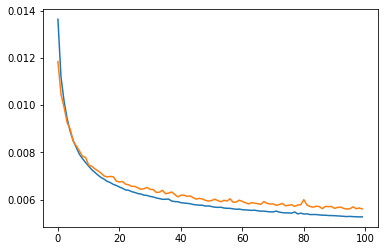

In [10]:
plt.plot(trainFit.history["loss"])
plt.plot(trainFit.history["val_loss"])

In [13]:
#Saving the model
#model.save('redundancychecker.h5')

# Plotting performance on test set

In [4]:
# you can read in a prior model here:
# model = keras.models.load_model("redundancychecker.h5")

W0902 14:49:23.172041 23456247883584 deprecation.py:506] From /home/jlin96/miniconda3/envs/GPU/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:143: calling RandomNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
#Creating predictions (takes a while to load)
testPredictVec = np.array([model.predict(np.array([testInput[x]])) for x in range(len(testInput))])
predictions = np.array([testPredictVec[x].flatten() for x in range(len(testPredictVec))])

In [8]:
#Creating initial, prediction, and actual arrays

#Temperature
testInitialTempVec = [(testInput[x,0:30].flatten()*std[0:30] + mu[0:30])*1.00464e3 for x in range(len(testInput))]
testInitialTempVec = np.array(testInitialTempVec)
testPredictTempVec = predictions[:,0:30]
testActualTempVec = testOutput[:,0:30]

testInitialTempError = testInitialTempVec - testActualTempVec
testPredictTempError = testPredictTempVec - testActualTempVec

#Moisture
testInitialMoistVec = [(testInput[x,30:60].flatten()*std[30:60] + mu[30:60])*2.501e6 for x in range(len(testInput))]
testInitialMoistVec = np.array(testInitialMoistVec)
testPredictMoistVec = predictions[:,30:60]
testActualMoistVec = testOutput[:,30:60]

testInitialMoistError = testInitialMoistVec - testActualMoistVec
testPredictMoistError = testPredictMoistVec - testActualMoistVec

In [9]:
# Creating 5th, 25th, 50th, and 75th percentile arrays for each elevation

initTempPerc = [np.percentile(testInitialTempError[:,x], [5,25,50,75,95]) for x in range(testInitialTempError.shape[1])]
initTempPerc = np.array(initTempPerc)

predTempPerc = [np.percentile(testPredictTempError[:,x], [5,25,50,75,95]) for x in range(testPredictTempError.shape[1])]
predTempPerc = np.array(predTempPerc)

initMoistPerc = [np.percentile(testInitialMoistError[:,x], [5,25,50,75,95]) for x in range(testInitialMoistError.shape[1])]
initMoistPerc = np.array(initMoistPerc)
                         
predMoistPerc = [np.percentile(testPredictMoistError[:,x], [5,25,50,75,95]) for x in range(testPredictMoistError.shape[1])]
predMoistPerc = np.array(predMoistPerc)

Text(0.5, 1.0, 'Temperature')

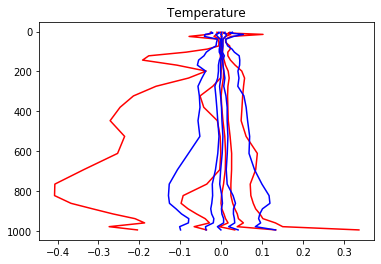

In [10]:
plt.plot(initTempPerc[:,0].flatten(), pressures, color = "red")
plt.plot(initTempPerc[:,1].flatten(), pressures, color = "red")
plt.plot(initTempPerc[:,2].flatten(), pressures, color = "red")
plt.plot(initTempPerc[:,3].flatten(), pressures, color = "red")
plt.plot(initTempPerc[:,4].flatten(), pressures, color = "red")

plt.plot(predTempPerc[:,0].flatten(), pressures, color = "blue")
plt.plot(predTempPerc[:,1].flatten(), pressures, color = "blue")
plt.plot(predTempPerc[:,2].flatten(), pressures, color = "blue")
plt.plot(predTempPerc[:,3].flatten(), pressures, color = "blue")
plt.plot(predTempPerc[:,4].flatten(), pressures, color = "blue")

plt.gca().invert_yaxis()

plt.title("Temperature")

Text(0.5, 1.0, 'Moisture')

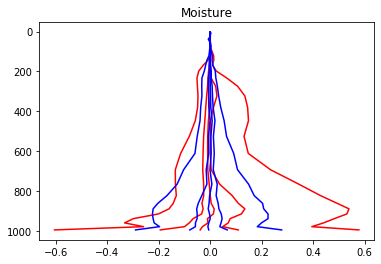

In [11]:
plt.plot(initMoistPerc[:,0].flatten(), pressures, color = "red")
plt.plot(initMoistPerc[:,1].flatten(), pressures, color = "red")
plt.plot(initMoistPerc[:,2].flatten(), pressures, color = "red")
plt.plot(initMoistPerc[:,3].flatten(), pressures, color = "red")
plt.plot(initMoistPerc[:,4].flatten(), pressures, color = "red")

plt.plot(predMoistPerc[:,0].flatten(), pressures, color = "blue")
plt.plot(predMoistPerc[:,1].flatten(), pressures, color = "blue")
plt.plot(predMoistPerc[:,2].flatten(), pressures, color = "blue")
plt.plot(predMoistPerc[:,3].flatten(), pressures, color = "blue")
plt.plot(predMoistPerc[:,4].flatten(), pressures, color = "blue")

plt.gca().invert_yaxis()

plt.title("Moisture")